Close to 800,000 people die due to suicide every year, which is one person every 40 seconds. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("master.csv")

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Is the suicide rate more prominent in some age categories than others?

In [9]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [7]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

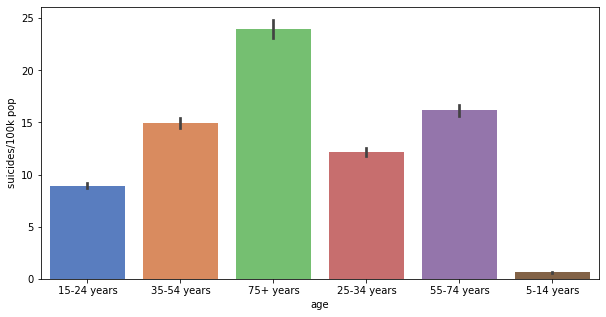

In [35]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='suicides/100k pop', data=data, palette='muted')  # barplot

Suicide rates increase with age.

## Which countries have the most and the least number of suicides?

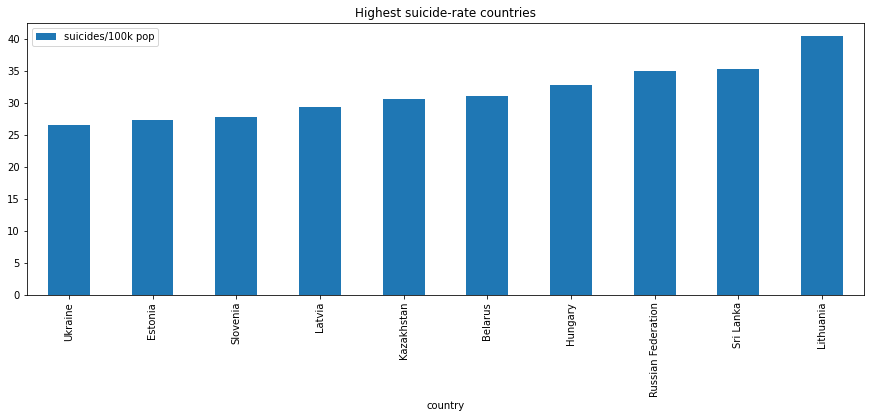

In [44]:
data.groupby(by=['country'])['suicides/100k pop'].mean().reset_index().sort_values(['suicides/100k pop']).tail(10).plot(x='country',
                                                                                                           y='suicides/100k pop',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.title('Highest suicide-rate countries')
plt.show()

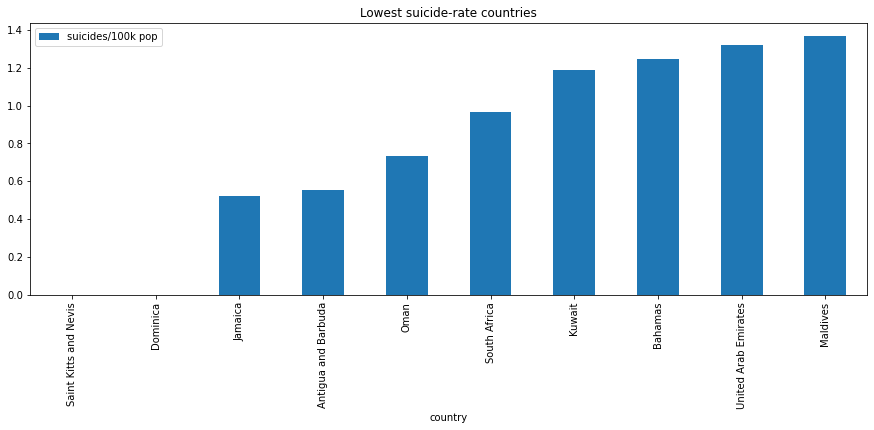

In [45]:
data.groupby(by=['country'])['suicides/100k pop'].mean().reset_index().sort_values(['suicides/100k pop']).head(10).plot(x='country',
                                                                                                           y='suicides/100k pop',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.title('Lowest suicide-rate countries')
plt.show()

Saint Kitts and Nevis have the lowest followed by Jamaica and Antigua and Barbada. Lithuania, Sri Lanka, and Russia have the highest.

## What is the effect of the population on suicide rates?

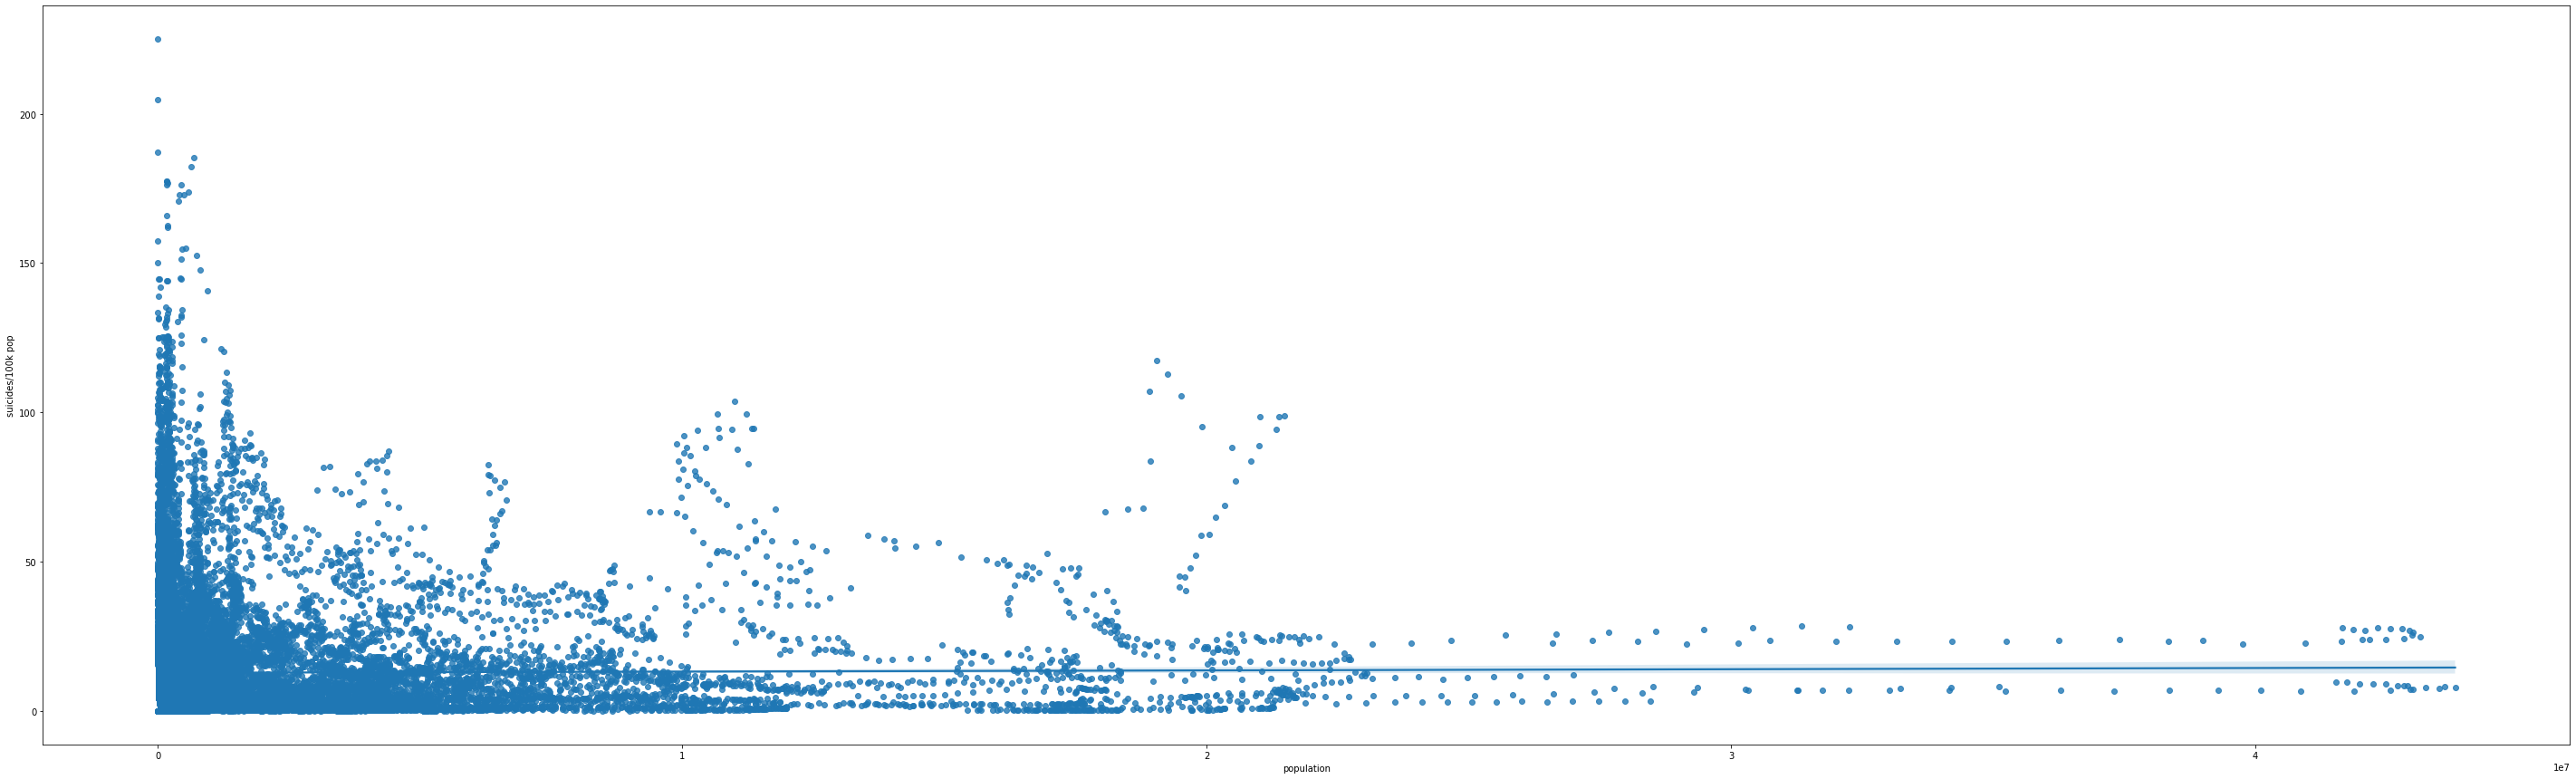

In [64]:
import numpy as np
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x=data['population'],y=data['suicides/100k pop'])

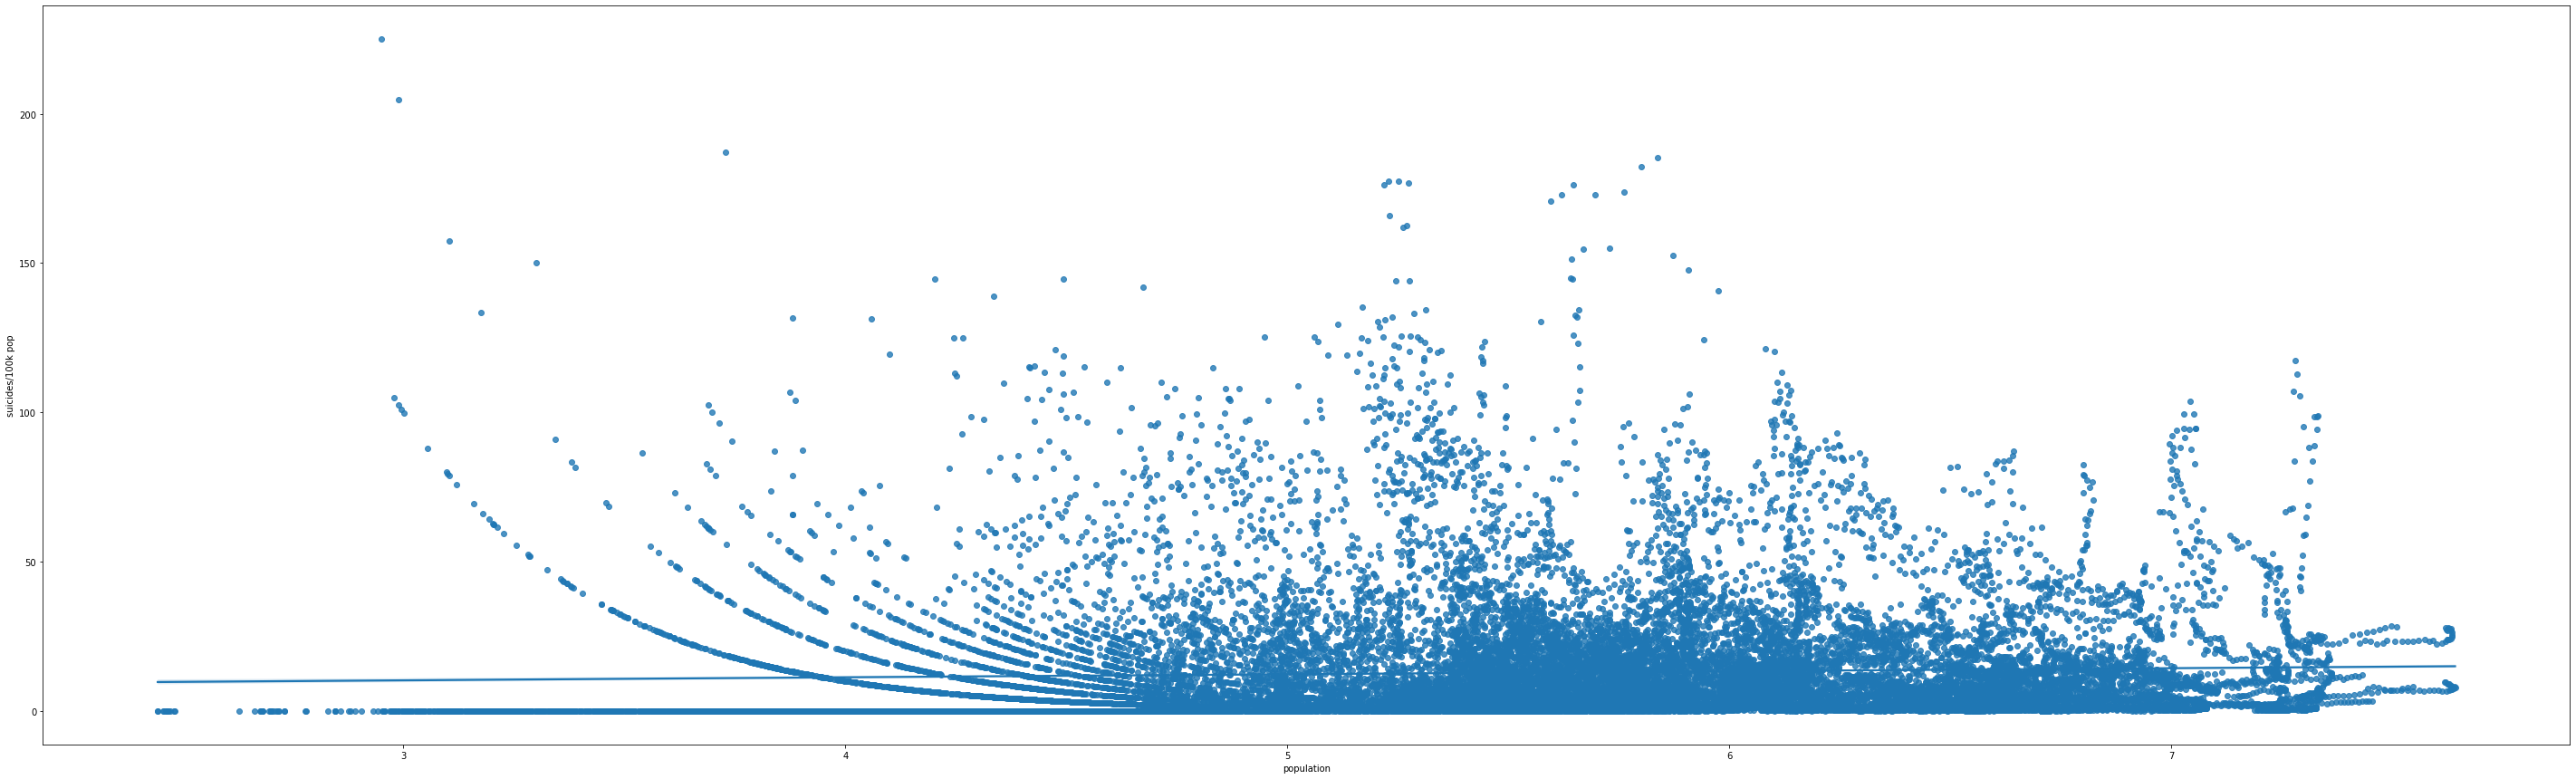

In [10]:
import numpy as np
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x=np.log10(data['population']),y=data['suicides/100k pop'])

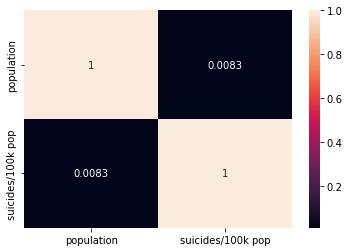

In [12]:
sns.heatmap(data[["population","suicides/100k pop"]].corr(), annot = True)

# display the plot
plt.show()

There does not appear to be a positive linear correlation between suicide rate and population.

## What is the effect of the GDP of a country on suicide rates?

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

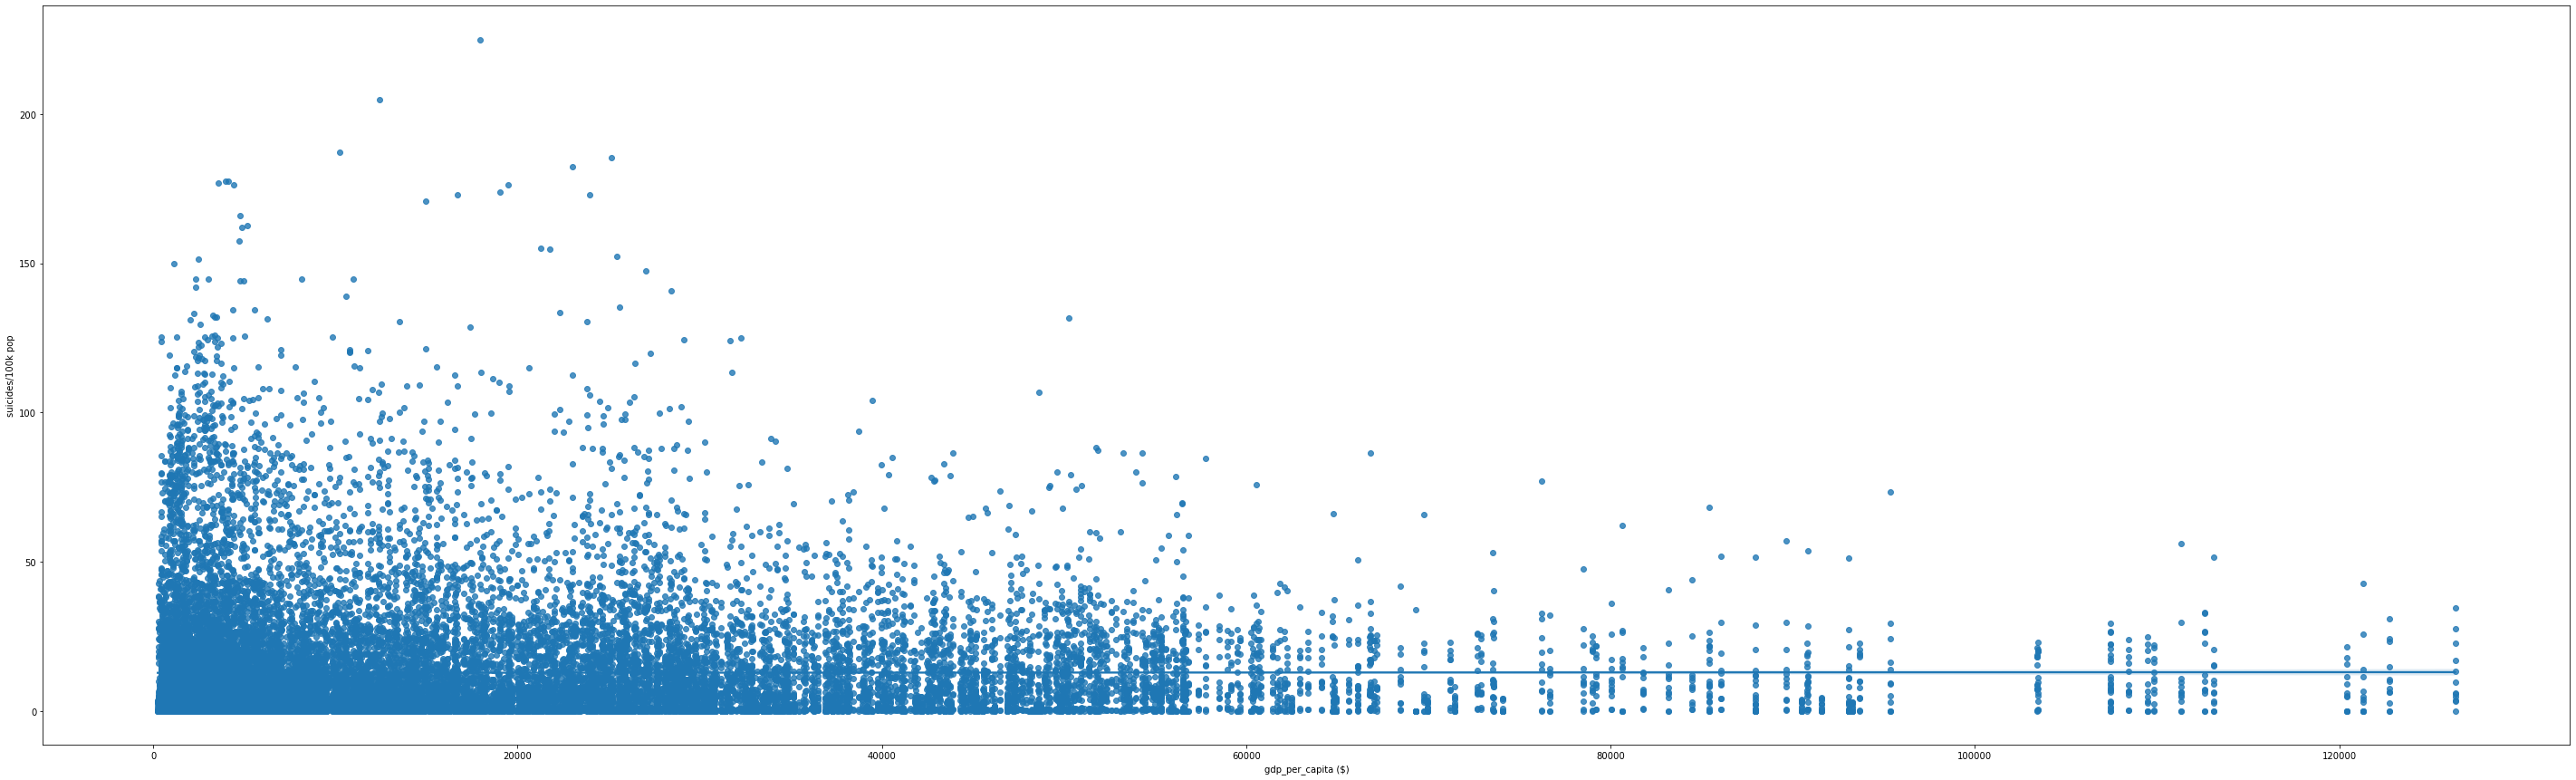

In [14]:
figure = plt.figure(figsize=(50,15))
sns.regplot(x=data['gdp_per_capita ($)'],y=data['suicides/100k pop'])

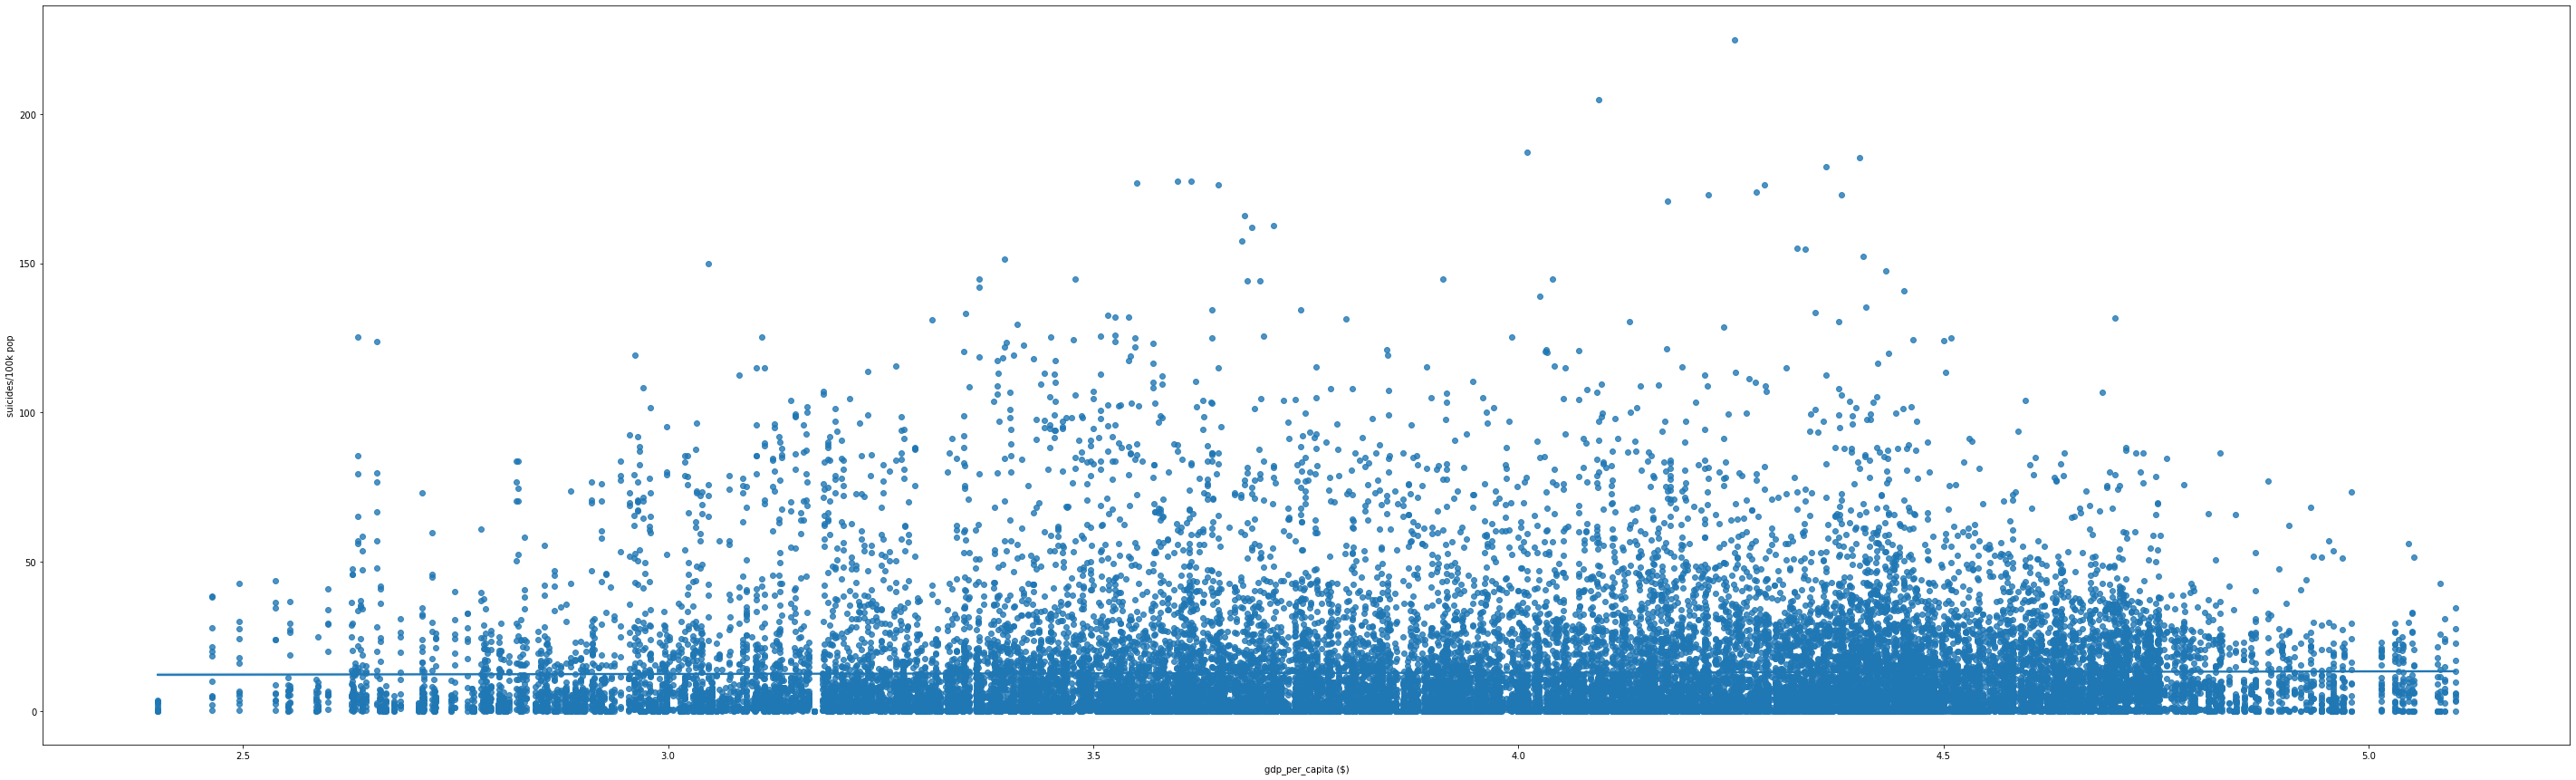

In [16]:
figure = plt.figure(figsize=(50,15))


ax = sns.regplot(x=np.log10(data['gdp_per_capita ($)']),y=data['suicides/100k pop'])

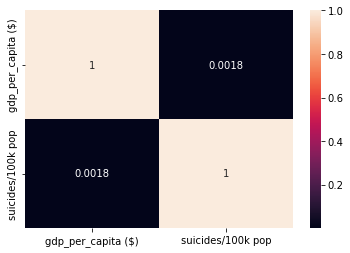

In [18]:
sns.heatmap(data[["gdp_per_capita ($)","suicides/100k pop"]].corr(), annot = True)

# display the plot
plt.show()

It does not appear that there is a strong correlation between GDP per capita and suicide rates

## What is the trend of suicide rates across all the years?

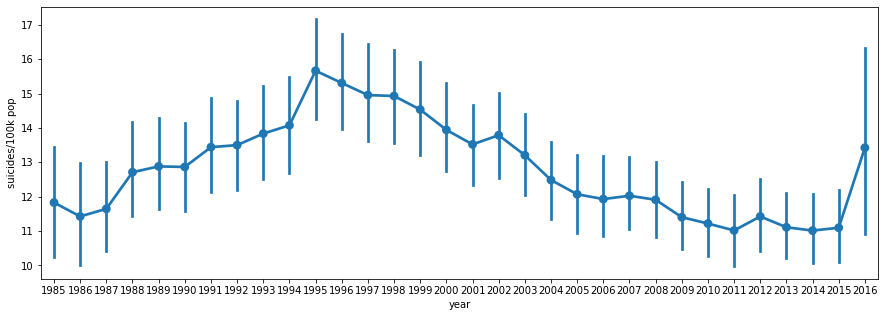

In [35]:
plt.figure(figsize=(15,5))

sns.pointplot(x="year", y="suicides/100k pop",  data=data)
plt.show()

It looks like suicides generally rose from 1985 to 1995 then dropped over the next 15 years before bottoming out for 5 years then rising again

## Is there a difference between the suicide rates of men and women?

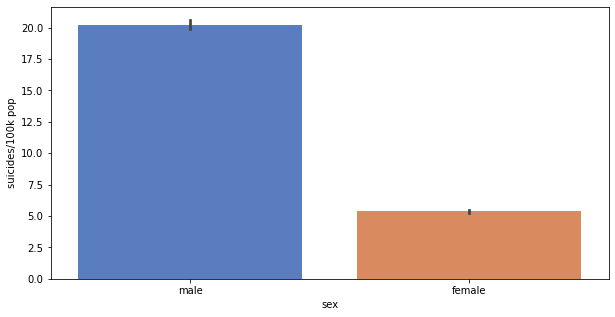

In [36]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='sex', y='suicides/100k pop', data=data, palette='muted')  # barplot

Men clearly have a higher suicide rate than women.